In [18]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

import IPython.display as ipd

Part 1: Identifying noise colors.

In [2]:
sampling_rate_1, noise_1 = wavfile.read('noise1.wav')
sampling_rate_2, noise_2 = wavfile.read('noise2.wav')
sampling_rate_3, noise_3 = wavfile.read('noise3.wav')

In [21]:
ipd.Audio(noise_1, rate=sampling_rate_1)

In [22]:
ipd.Audio(noise_2, rate=sampling_rate_2)

In [23]:
ipd.Audio(noise_3, rate=sampling_rate_3)

Estimating the power spectral density of noises using the periodogram.

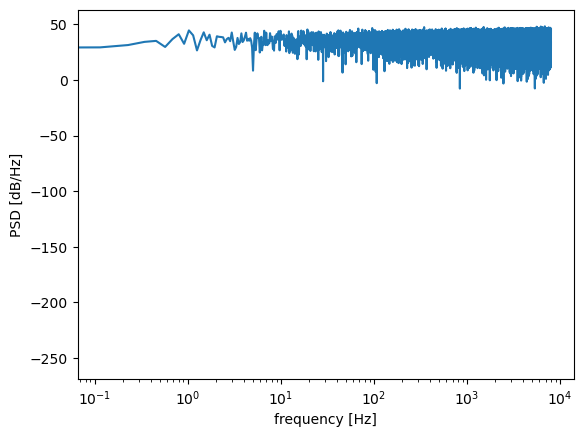

In [26]:
#compute periodogram of noise
f_1, Pxx_den_1 = signal.periodogram(noise_1, sampling_rate_1)
#plot periodogram with octave and decibel scale
plt.semilogx(f_1, 10*np.log10(Pxx_den_1))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()

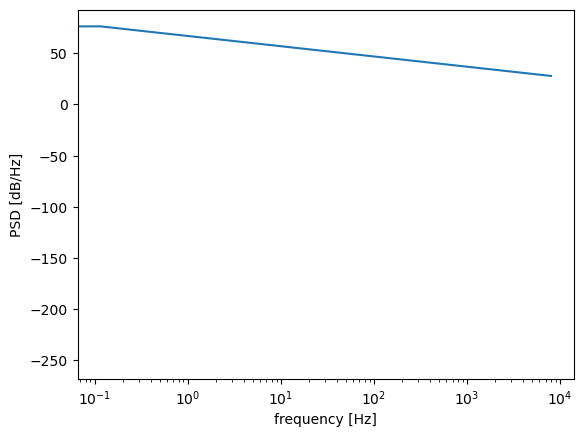

In [27]:
f_2, Pxx_den_2 = signal.periodogram(noise_2, sampling_rate_2)
plt.semilogx(f_2, 10*np.log10(Pxx_den_2))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()

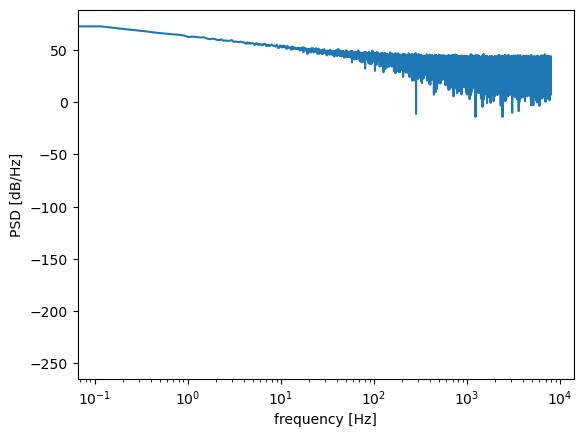

In [28]:
f_3, Pxx_den_3 = signal.periodogram(noise_3, sampling_rate_3)
plt.semilogx(f_3, 10*np.log10(Pxx_den_3))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()

Estimating the power spectral density of noise using welch's method.

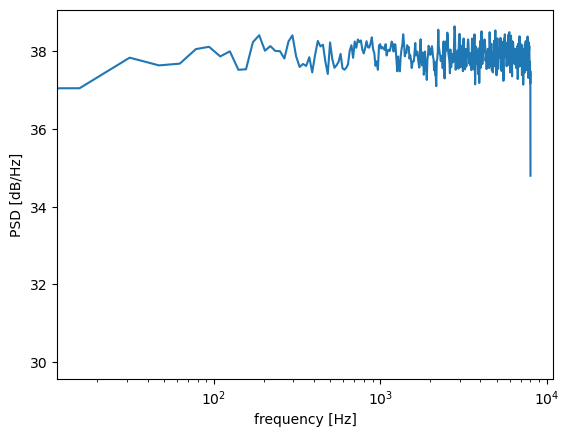

In [29]:
f_1, Pxx_den_1 = signal.welch(noise_1, sampling_rate_1, nperseg=1024)
plt.semilogx(f_1, 10*np.log10(Pxx_den_1))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()

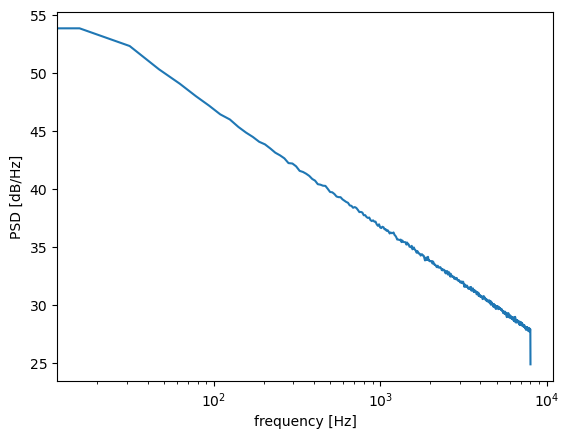

In [30]:
f_2, Pxx_den_2 = signal.welch(noise_2, sampling_rate_2, nperseg=1024)
plt.semilogx(f_2, 10*np.log10(Pxx_den_2))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()

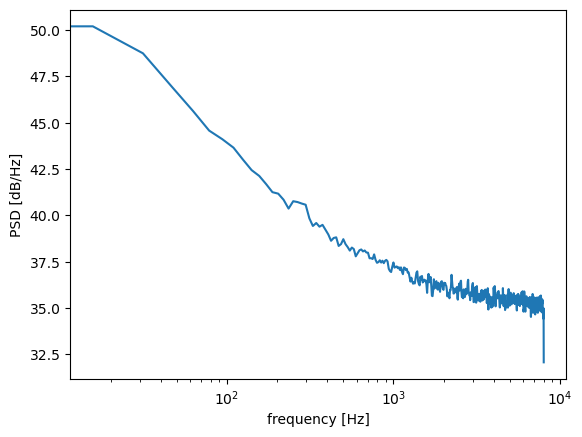

In [31]:
f_3, Pxx_den_3 = signal.welch(noise_3, sampling_rate_3, nperseg=1024)
plt.semilogx(f_3, 10*np.log10(Pxx_den_3))
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [dB/Hz]')
plt.show()


Part 2: Noising and denoising Barbara

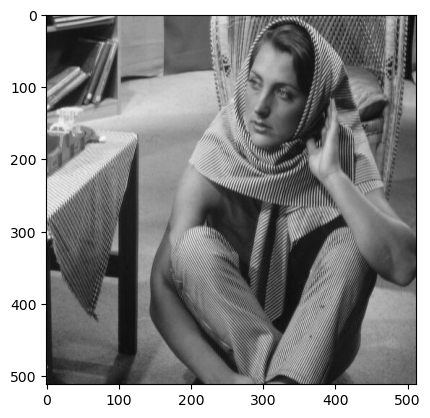

In [36]:
image = plt.imread('barbara.jpg')
image = image[:,:,0]

In [191]:
snr = 10**10
target_snrs = [0, 5, 10, 15, 20]
variances = []
variance = 1
while snr > 0:
    noise = np.random.normal(0, variance, image.shape)
    noisy_image = image + noise
    snr = 20*np.log10(np.sum(np.abs(image))/np.sum(np.abs(image-noisy_image)))
    #check snr is close to last element in target_snrs
    if np.abs(snr - target_snrs[-1]) < 1:
        target_snrs.pop()
        variances.insert(0, variance)
    variance *= 1.3
if len(target_snrs) > 0:
    print('Could not fit all target SNRs')
else:
    print(variances)

[146.19202903754478, 86.50415919381346, 39.37376385699292, 23.298085122481016, 13.785849184900009]


We have found the variance values which give us a noised image with SNR of approximately 0db, 5db, 10db, 15db, 20db.

In [192]:
#apply noises to image using the found variances
noisy_images = []
for variance in variances:
    noise = np.random.normal(0, variance, image.shape)
    noisy_image = image + noise
    noisy_images.append(noisy_image)

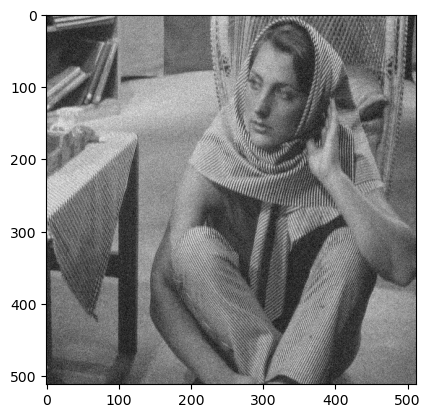

In [198]:
plt.imshow(noisy_images[4], cmap='gray')

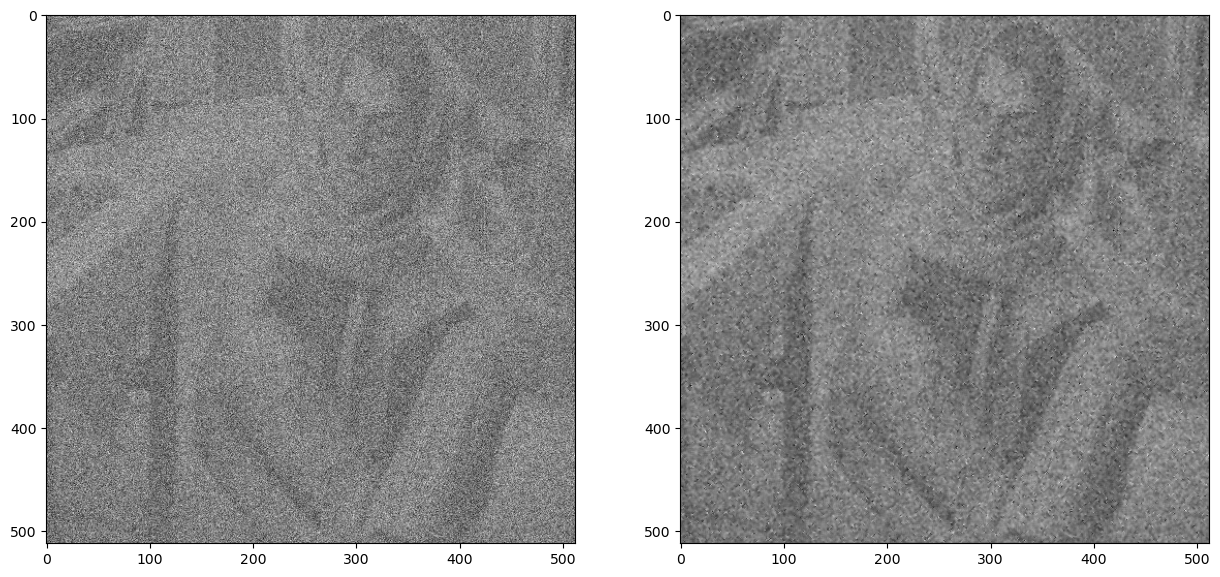

In [229]:
image_id = 0
#attempt to denoise the first image using the wiener filter
denoised_image = signal.wiener(noisy_images[image_id], mysize=3)
#plot noisy and denoised images side by side
plt.subplot(1, 2, 1)
plt.imshow(noisy_images[image_id], cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(denoised_image, cmap='gray')
#scale up the plot
plt.gcf().set_size_inches(15, 15)

Part 3: Denoising the piece of music
